In [1]:
import numpy as np
from scipy.stats import cauchy
from scipy.stats import expon, anderson
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize': (14, 7)})

#### Задача 1. Предположим, мы хотим найти вероятность того, что на игральной кости при броске выпадет значение больше 4.

$P(A) = \frac{N(A)}{N(\Omega)}$

$P(A) = \frac{2}{6} = 0.33$

In [3]:
2 / 6

0.3333333333333333

#### Задача 2. Написать функцию для вычисления факториала и рассчитать число сочетаний из 6 по 2.

In [4]:
def fact(x):
    factorial = 1
    
    [factorial := factorial * i for i in range(1, x + 1)]
    
    return factorial

$C_{n}^k = \frac{n!}{k!(n - k)!} = C_{6}^2 = \frac{6!}{2!(6 - 2)!} = \frac{720}{48} = 15$

In [5]:
int(fact(6) / (fact(2) * fact(6 - 2)))

15

In [6]:
def combination(n, k):
    return int(fact(n) / (fact(k) * fact(n - k)))

In [7]:
combination(6, 2)

15

#### Задача 3. Из 30 стрелков 12 попадает в цель с вероятностью 0,6, 8 стрелков — с вероятностью 0,5, а 10 — с вероятностью 0,7. Наудачу выбранный стрелок произвёл выстрел, поразив цель. К какой из групп, вероятнее всего, принадлежал этот стрелок?

$P(A|B) = \frac{P(B|A)\ *\ P(A)}{P(B)}$

First:

$
P(A|B) = \frac{0.6\ *\ \frac{12}{30}}{(0.6\ *\ \frac{12}{30})\ +\ (0.5\ *\ \frac{8}{30})\ +\ (0.7\ *\ \frac{10}{30})} = 
\frac{0.24}{0.24\ +\ 0.1333\ +\ 0.2333} = \frac{0.24}{0.6066} = 0.3956
$

Second:

$
P(A|B) = \frac{0.5\ *\ \frac{8}{30}}{(0.6\ *\ \frac{12}{30})\ +\ (0.5\ *\ \frac{8}{30})\ +\ (0.7\ *\ \frac{10}{30})} = 
\frac{0.1333}{0.24\ +\ 0.1333\ +\ 0.2333} = \frac{0.1333}{0.6066} = 0.2198
$

Third:

$
P(A|B) = \frac{0.7\ *\ \frac{10}{30}}{(0.6\ *\ \frac{12}{30})\ +\ (0.5\ *\ \frac{8}{30})\ +\ (0.7\ *\ \frac{10}{30})} = 
\frac{0.2333}{0.24\ +\ 0.1333\ +\ 0.2333} = \frac{0.2333}{0.6066} = 0.3846
$

Видим, что вероятнее всего наудачу выбранный стрелок относится к первой группе (вероятность почти 40%).

Сумма всех вероятностей должна равняться 1:

$0.3956 + 0.2198 + 0.3846 = 1$

In [8]:
0.3956 + 0.2198 + 0.3846

1.0

In [9]:
def bayes(b_a, a, b):
    return b_a * a / b

In [10]:
b = 0.6 * (12 / 30) + 0.5 * (8 / 30) + 0.7 * (10 / 30)
b

0.6066666666666666

In [11]:
first = bayes(0.6, 12 / 30, b)
first

0.39560439560439564

In [12]:
second = bayes(0.5, 8 / 30, b)
second

0.2197802197802198

In [13]:
third = bayes(0.7, 10 / 30, b)
third

0.38461538461538464

In [14]:
first + second + third

1.0

Ответ: первая группа.

#### Задача 4. Сгенерировать выборку реализаций случайной величины (кроме распределения Коши). Распределение можно выбрать на этом [сайте](https://docs.scipy.org/doc/scipy/reference/stats.html). Проверить ЦПТ для различных n.

In [15]:
r_10 = [expon.rvs(size=100).mean() for _ in range(10)]
r_100 = [expon.rvs(size=100).mean() for _ in range(100)]
r_1000 = [expon.rvs(size=100).mean() for _ in range(1000)]
r_10000 = [expon.rvs(size=100).mean() for _ in range(10000)]

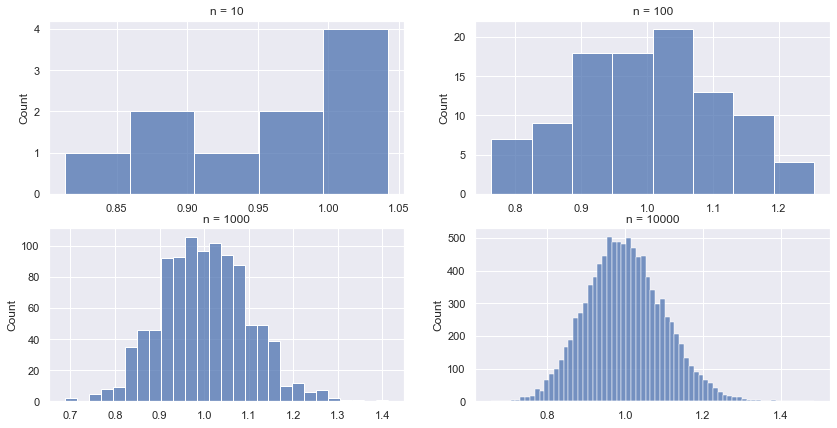

In [16]:
fig, axes = plt.subplots(2, 2)
ax1 = sns.histplot(r_10, ax=axes[0, 0])
ax1.set_title('n = 10')
ax2 = sns.histplot(r_100, ax=axes[0, 1])
ax2.set_title('n = 100')
ax3 = sns.histplot(r_1000, ax=axes[1, 0])
ax3.set_title('n = 1000')
ax4 = sns.histplot(r_10000, ax=axes[1, 1])
ax4.set_title('n = 10000');

In [17]:
print(f'При n = 10:\n{anderson(r_10)}\n\nПри n = 100:\n{anderson(r_100)}\n\n'
      f'При n = 1000:\n{anderson(r_1000)}\n\nПри n = 10000:\n{anderson(r_10000)}')

При n = 10:
AndersonResult(statistic=0.22346358058944027, critical_values=array([0.501, 0.57 , 0.684, 0.798, 0.95 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

При n = 100:
AndersonResult(statistic=0.19102783379862842, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

При n = 1000:
AndersonResult(statistic=0.5629371813257649, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

При n = 10000:
AndersonResult(statistic=5.321119308477137, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


#### Задача 5. Попробовать применить ЦПТ к распределению Коши.

In [18]:
r = [cauchy.rvs(size=1000).mean() for _ in range(100)]

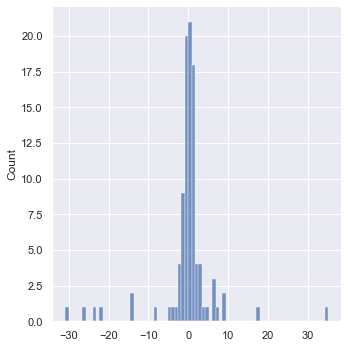

In [19]:
sns.displot(np.array(r));

In [20]:
anderson(np.array(r))

AndersonResult(statistic=13.301831708884052, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

#### Задача 6. Посчитать основные характеристики выборки.

In [21]:
arr = np.array(r)

In [22]:
print(f'mean: {np.mean(arr)}\nmedian: {np.median(arr)}\nmin: {np.min(arr)}\nmax: {np.max(arr)}\nstd: {np.std(arr)}')

mean: -0.2003519819684499
median: 0.16300897877037138
min: -30.860252470739198
max: 35.09540777251715
std: 7.224610624016854


#### Задача 7. Посчитать коэффициент корреляции для двух векторов.

In [23]:
arr2 = np.array(r_100)

In [24]:
len(arr), len(arr2)

(100, 100)

In [25]:
np.corrcoef(arr, arr2)

array([[ 1.        , -0.04218252],
       [-0.04218252,  1.        ]])